# Gradient Descent and Regression Models

In [2]:
from sklearn import datasets
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Create a dataset

Create an array of the given shape and populate it with random samples from a uniform distribution over [0, 1).

In [2]:
np.random.seed(42)

In [3]:
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)

Text(0, 0.5, 'y')

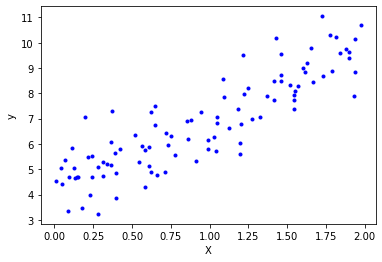

In [4]:
plt.plot(X, y, 'b.')
plt.xlabel('X')
plt.ylabel('y')

## Normal Equation

In [5]:
X[:5]

array([[0.74908024],
       [1.90142861],
       [1.46398788],
       [1.19731697],
       [0.31203728]])

Add x0 = 1 t0 each instance

In [6]:
X_b = np.c_[np.ones((100,1)), X]

In [7]:
X_b[0:5]

array([[1.        , 0.74908024],
       [1.        , 1.90142861],
       [1.        , 1.46398788],
       [1.        , 1.19731697],
       [1.        , 0.31203728]])

Use the normal euqation to compute the weights (theta)

In [8]:
theta_ne = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)

In [9]:
theta_ne

array([[4.21509616],
       [2.77011339]])

## scikit-learn Linear Regression

In [10]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X, y)
lin_reg.intercept_, lin_reg.coef_

(array([4.21509616]), array([[2.77011339]]))

## Gradient Descent

In [11]:
eta = 0.1 #learning rate
n_iteration = 1000
m = len(X)

Random initializtion of weights sampled from normal distribution (0 mean, 1 variance)

In [12]:
theta_gd = np.random.randn(2,1)

In [13]:
theta_gd

array([[0.01300189],
       [1.45353408]])

In [14]:
for iteration in range(n_iteration):
    gradients = 2/m * X_b.T.dot(X_b.dot(theta_gd) - y)
    theta_gd = theta_gd - eta * gradients

In [15]:
theta_gd

array([[4.21509616],
       [2.77011339]])

Make prediction for a new instance

In [16]:
X_new = np.array([[0], [2]])
X_new_b = np.c_[np.ones((2, 1)), X_new]  # add x0 = 1 to each instance
y_predict = X_new_b.dot(theta_gd)
y_predict

array([[4.21509616],
       [9.75532293]])

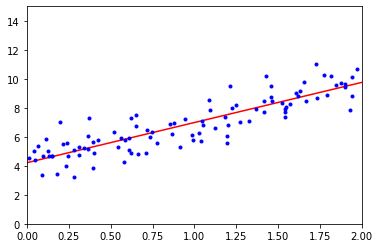

In [17]:
plt.plot(X_new, y_predict, "r-")
plt.plot(X, y, "b.")
plt.axis([0, 2, 0, 15])
plt.show()

## Learning rate

In [18]:
def plot_gradient_descent(theta, eta, theta_path=None):
    m = len(X_b)
    plt.plot(X, y, "b.")
    n_iterations = 1000
    for iteration in range(n_iterations):
        # plotting the first 10 lines
        if iteration < 10:
            y_predict = X_new_b.dot(theta)
            style = "b-" if iteration > 0 else "r--"
            plt.plot(X_new, y_predict, style)
            
        gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)
        theta = theta - eta * gradients

    plt.xlabel("$x_1$", fontsize=18)
    plt.axis([0, 2, 0, 15])
    plt.title(r"$\eta = {}$".format(eta), fontsize=16)

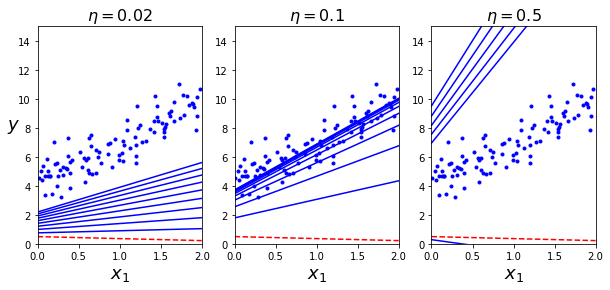

In [19]:
np.random.seed(42)
theta = np.random.randn(2,1)
plt.figure(figsize=(10,4))
plt.subplot(131); plot_gradient_descent(theta, eta=0.02)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.subplot(132); plot_gradient_descent(theta, eta=0.1)
plt.subplot(133); plot_gradient_descent(theta, eta=0.5)

## Stochastic Gradient Descent

In [20]:
np.random.seed(42)

In [21]:
eta = 0.1 #learning rate
n_iteration = 1000
m = len(X)
theta = np.random.randn(2,1)

In [22]:
for iteration in range(n_iteration):
    random_index = np.random.randint(m)
    xi = X_b[random_index:random_index+1]
    yi = y[random_index:random_index+1]
    gradients = 2 * xi.T.dot(xi.dot(theta) - yi)
    theta = theta - eta * gradients

In [23]:
theta

array([[4.06816038],
       [2.87191524]])

## Mini-batch Gradient Descent

In [24]:
np.random.seed(42)

In [25]:
eta = 0.1 #learning rate
n_iteration = 1000
m = len(X)
minibatch_size = 20
theta = np.random.randn(2,1)

In [26]:
for iteration in range(n_iteration):
    shuffled_indices = np.random.permutation(m)
    X_b_shuffled = X_b[shuffled_indices]
    y_shuffled = y[shuffled_indices]
    xi = X_b_shuffled[0:minibatch_size]
    yi = y_shuffled[0:minibatch_size]
    gradients = 2/minibatch_size * xi.T.dot(xi.dot(theta) - yi)
    theta = theta - eta * gradients

In [27]:
theta

array([[4.19617705],
       [2.8344428 ]])

# In practice

In [28]:
np.random.seed(42)
eta = 0.1 #learning rate
n_epochs = 1000
m = len(X)
minibatch_size = 20
theta = np.random.randn(2,1)

In [29]:
for epoch in range(n_epochs):
    shuffled_indices = np.random.permutation(m)
    X_b_shuffled = X_b[shuffled_indices]
    y_shuffled = y[shuffled_indices]
    for i in range(0, m, minibatch_size):
        xi = X_b_shuffled[i:i+minibatch_size]
        yi = y_shuffled[i:i+minibatch_size]
        gradients = 2/minibatch_size * xi.T.dot(xi.dot(theta) - yi)
        theta = theta - eta * gradients

In [30]:
theta

array([[4.19811521],
       [2.75356112]])

## Linear Regression Example

In [3]:
boston = datasets.load_boston()

In [4]:
boston.data.shape

(506, 13)

In [5]:
boston.feature_names

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [34]:
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [35]:
df_boston = pd.DataFrame(boston.data, columns=boston.feature_names)
df_boston['Target'] = pd.Series(boston.target)
df_boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [36]:
# Exploratory Data Analysis (EDA)
import matplotlib.pyplot as plt
import seaborn as sns

In [37]:
cols = ['CRIM', 'LSTAT', 'DIS', 'RM', 'Target']

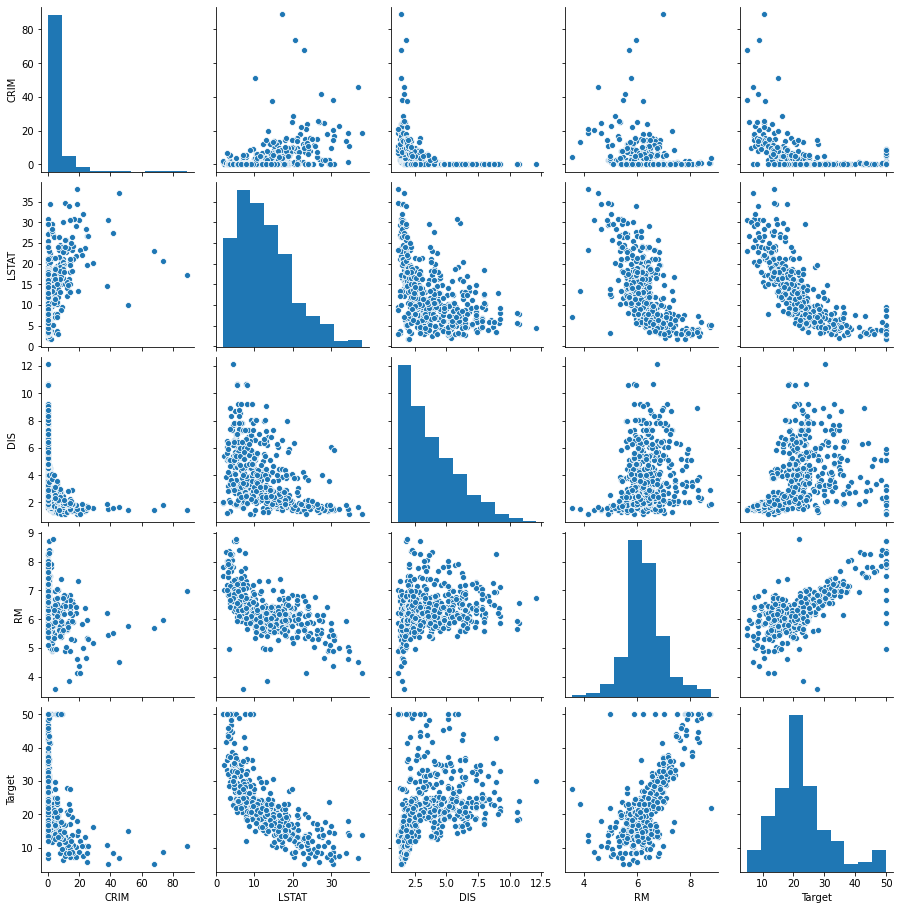

In [38]:
sns.pairplot(df_boston[cols])

In [39]:
cm = np.corrcoef(df_boston[cols].values.T)

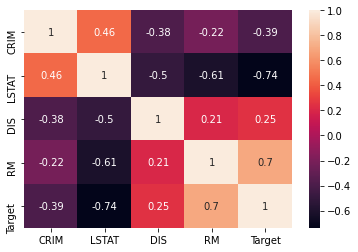

In [40]:
hm = sns.heatmap(cm, cbar=True, annot=True, xticklabels=cols, yticklabels=cols)

### Simple Linear Regression

In [41]:
X = df_boston[['RM']].values

In [42]:
y = df_boston['Target'].values

In [43]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

In [44]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [45]:
slr = LinearRegression()

In [46]:
slr.fit(X_train, y_train)

LinearRegression()

In [47]:
print('slope: ', slr.coef_[0])

slope:  8.46109163711589


In [48]:
print('intercept:', slr.intercept_)

intercept: -30.571032410898322


In [49]:
def lin_reg_plot(X, y, model):
    plt.scatter(X, y, c='blue', edgecolors='white')
    plt.plot(X, model.predict(X), color='black')

Text(0.5, 1.0, 'Training set')

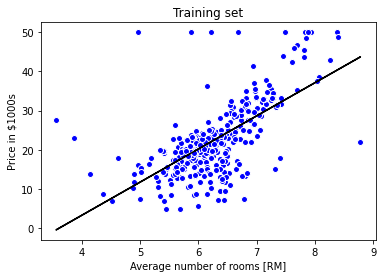

In [50]:
lin_reg_plot(X_train, y_train, slr)
plt.xlabel('Average number of rooms [RM]') 
plt.ylabel('Price in $1000s')
plt.title('Training set')

Text(0.5, 1.0, 'Test set')

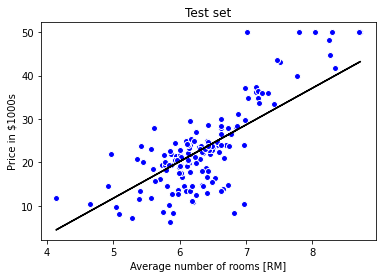

In [51]:
lin_reg_plot(X_test, y_test, slr)
plt.xlabel('Average number of rooms [RM]') 
plt.ylabel('Price in $1000s')
plt.title('Test set')

### Multiple Linear Regression

In [52]:
from sklearn.preprocessing import StandardScaler

In [53]:
scaler = StandardScaler()

In [54]:
X = df_boston.iloc[:,0:-1].values

In [55]:
X.shape

(506, 13)

In [56]:
y = df_boston['Target'].values

In [57]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [58]:
scaler.fit(X_train)

StandardScaler()

In [59]:
X_train_scaled = scaler.transform(X_train)

In [60]:
X_test_scaled = scaler.transform(X_test)

In [61]:
mlr = LinearRegression()

In [62]:
mlr.fit(X_train_scaled, y_train)

LinearRegression()

In [63]:
y_pred = mlr.predict(X_test_scaled)

In [64]:
# residual plots
def residual_plot(y_pred, y):
    plt.scatter(y_pred, y_pred-y, c="blue", marker='s', label="Residual plot")
    plt.xlabel("Predicted values")
    plt.ylabel("Residuals")
    plt.hlines(y=0, color="black", xmin=-10, xmax=50)

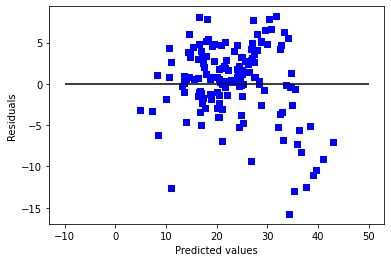

In [65]:
residual_plot(y_pred, y_test)

In [66]:
from sklearn.metrics import mean_squared_error

In [67]:
mean_squared_error(y_test, y_pred)

19.831323672063125

### Regularized Linear Regression

In [68]:
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet

In [69]:
ridge = Ridge(alpha=1.0)

In [70]:
ridge.fit(X_train_scaled, y_train)

Ridge()

In [71]:
y_pred_ridge = ridge.predict(X_test_scaled)

In [72]:
mean_squared_error(y_test, y_pred_ridge)

19.80987949611701

In [73]:
lasso = Lasso(alpha=1.0)

In [74]:
lasso.fit(X_train_scaled, y_train)

Lasso()

In [75]:
y_pred_lasso = lasso.predict(X_test_scaled)

In [76]:
mean_squared_error(y_test, y_pred_lasso)

29.89024282935218

In [77]:
elanet = ElasticNet(alpha=1.0, l1_ratio=0.5)

In [78]:
elanet.fit(X_train_scaled, y_train)

ElasticNet()

In [79]:
y_pred_elanet = elanet.predict(X_test_scaled)

In [80]:
mean_squared_error(y_test, y_pred_elanet)

31.67152823129687

### Polynomial Regression

In [81]:
from sklearn.preprocessing import PolynomialFeatures

In [82]:
X = df_boston[['LSTAT']].values
y = df_boston['Target'].values

In [83]:
quadratic = PolynomialFeatures(degree=2)

In [84]:
cubic = PolynomialFeatures(degree=3)

In [85]:
X_quad = quadratic.fit_transform(X)

In [86]:
X_cubic = cubic.fit_transform(X)

In [87]:
X_fit = np.arange(X.min(), X.max(), 1).reshape(-1,1)

In [88]:
lr = LinearRegression()

In [89]:
# Linear Regression
lr = lr.fit(X, y)
y_lin_fit = lr.predict(X_fit)

In [90]:
# Linear Regression with degree=2
lr = lr.fit(X_quad, y)
y_quad_fit = lr.predict(quadratic.fit_transform(X_fit))

In [91]:
# Linear Regression with degress=3
lr = lr.fit(X_cubic, y)
y_cubic_fit = lr.predict(cubic.fit_transform(X_fit))

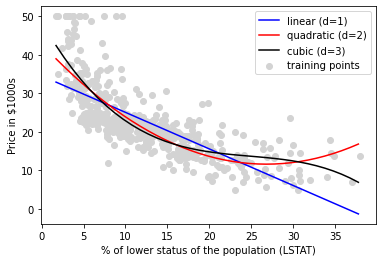

In [92]:
plt.scatter(X, y, label="training points", color='lightgray')
plt.plot(X_fit, y_lin_fit, label='linear (d=1)', color='blue', linestyle='-')
plt.plot(X_fit, y_quad_fit, label='quadratic (d=2)', color='red', linestyle='-')
plt.plot(X_fit, y_cubic_fit, label='cubic (d=3)', color='black', linestyle='-')
plt.xlabel('% of lower status of the population (LSTAT)')
plt.ylabel('Price in $1000s')
plt.legend(loc='upper right')